Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
                   Model  Accuracy
0  Untuned Decision Tree     0.520
1    Tuned Decision Tree     0.465


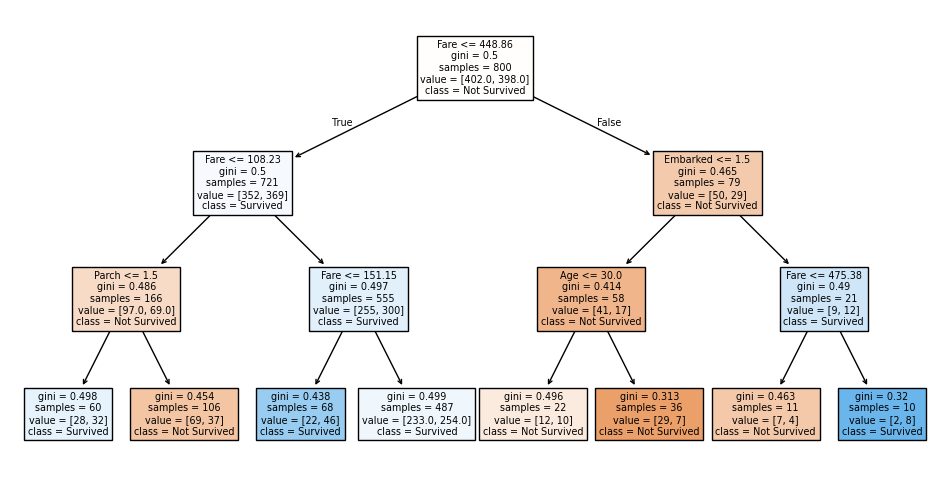

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv("titanic.csv")  


df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)  
df.dropna(inplace=True) 

encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])  
df["Embarked"] = encoder.fit_transform(df["Embarked"])

X = df.drop(columns=["Survived"])
y = df["Survived"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

untuned_model = DecisionTreeClassifier(random_state=42)
tuned_model = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)

untuned_model.fit(X_train, y_train)
tuned_model.fit(X_train, y_train)

y_pred_untuned = untuned_model.predict(X_test)
y_pred_tuned = tuned_model.predict(X_test)

acc_untuned = accuracy_score(y_test, y_pred_untuned)
acc_tuned = accuracy_score(y_test, y_pred_tuned)

comparison = pd.DataFrame({
    "Model": ["Untuned Decision Tree", "Tuned Decision Tree"],
    "Accuracy": [acc_untuned, acc_tuned]
})

print("Best Hyperparameters:", grid_search.best_params_)
print(comparison)

plt.figure(figsize=(12, 6))
plot_tree(tuned_model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, max_depth=3)
plt.show()